## arbol de decisión

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
#cargamos el dataset y mostramos las 5 filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

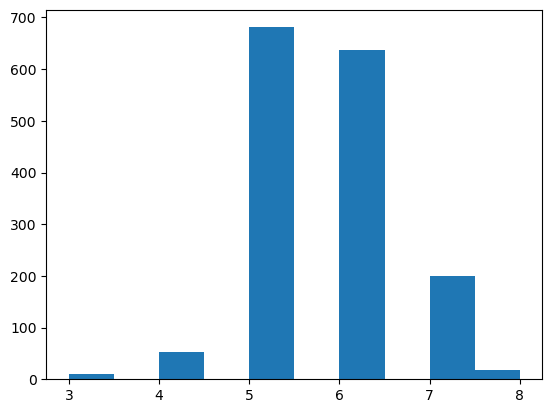

In [15]:
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='fixed acidity'>

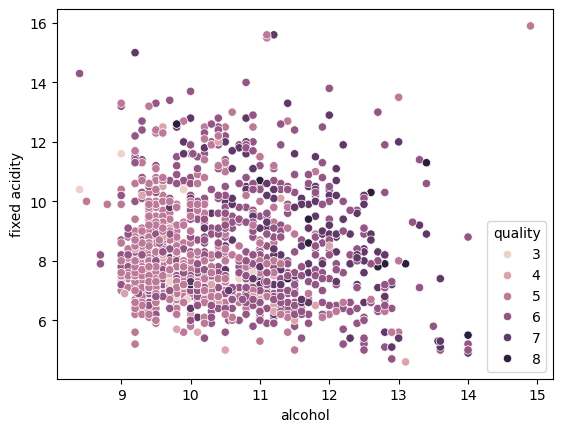

In [17]:
sns.scatterplot(x = "alcohol", y = "fixed acidity", hue ="quality",data = data)

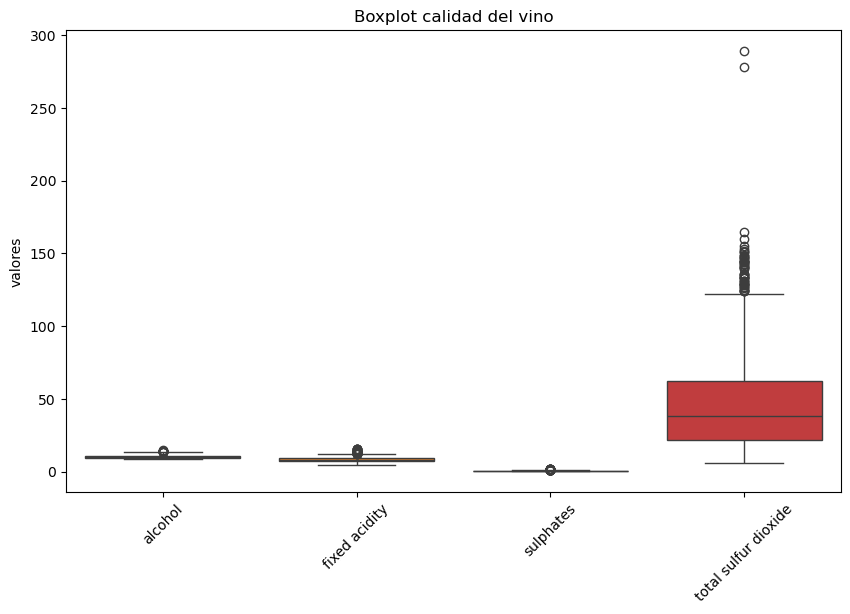

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['alcohol', 'fixed acidity' , 'sulphates' , 'total sulfur dioxide']])
plt.xticks(rotation=45)
plt.title('Boxplot calidad del vino')
plt.ylabel('valores')
plt.show()

In [33]:
predictors_col = ["alcohol","fixed acidity","sulphates","total sulfur dioxide"]
target_col = ['quality']

In [45]:
predictors = data[predictors_col]
target = data[target_col]

In [47]:
predictors

,alcohol,fixed acidity,sulphates,total sulfur dioxide
0,9.4,7.4,0.56,34.0
1,9.8,7.8,0.68,67.0
2,9.8,7.8,0.65,54.0
3,9.8,11.2,0.58,60.0
4,9.4,7.4,0.56,34.0
...,...,...,...,...
1594,10.5,6.2,0.58,44.0
1595,11.2,5.9,0.76,51.0
1596,11.0,6.3,0.75,40.0
1597,10.2,5.9,0.71,44.0


In [49]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [51]:
corr = predictors.corr()
corr

,alcohol,fixed acidity,sulphates,total sulfur dioxide
alcohol,1.000000,-0.061668,0.093595,-0.205654
fixed acidity,-0.061668,1.000000,0.183006,-0.113181
sulphates,0.093595,0.183006,1.000000,0.042947
total sulfur dioxide,-0.205654,-0.113181,0.042947,1.000000


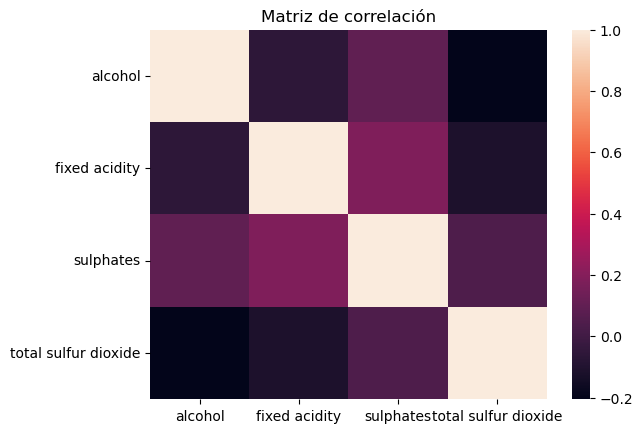

In [55]:
sns.heatmap(corr)
plt.title('Matriz de correlación')
plt.show()

In [65]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [66]:
tree = DecisionTreeClassifier()

In [67]:
arbol = tree.fit(x_train, y_train)

[Text(0.5443099877262965, 0.9772727272727273, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.25807499424670144, 0.9318181818181818, 'x[2] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.40119249098649895, 0.9545454545454546, 'True  '),
 Text(0.0681574102485425, 0.8863636363636364, 'x[0] <= 9.533\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.021478981282602026, 0.8409090909090909, 'x[0] <= 9.075\ngini = 0.206\nsamples = 89\nvalue = [0, 5, 79, 5, 0, 0]'),
 Text(0.00981896287204664, 0.7954545454545454, 'x[2] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.00490948143602332, 0.75, 'x[2] <= 0.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.00245474071801166, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.00736422215403498, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0

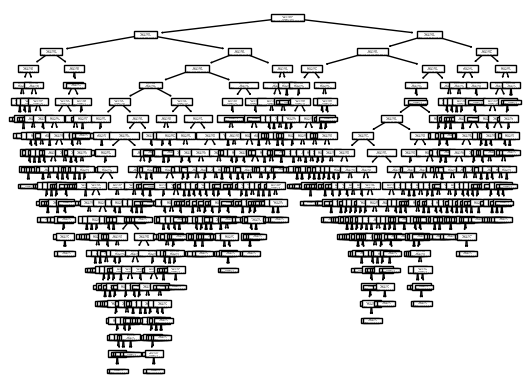

In [68]:
plot_tree(arbol)

In [73]:
predicciones = arbol.predict(x_test)

In [75]:
predicciones

array([7, 7, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 7, 4, 6, 7, 5, 7, 5, 6,
       6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 7, 7, 5, 7, 7, 5, 5, 6, 5, 5, 7, 7,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 7, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 4, 5, 5, 6, 7, 6, 6, 5, 7,
       5, 8, 5, 6, 5, 6, 7, 7, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 7, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 4, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 4, 6, 5, 5, 6, 7, 5, 6, 6, 5, 7,
       5, 5, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 6, 6, 3, 6, 5, 4, 6,
       6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 7, 5, 6, 5, 7, 5, 5,
       7, 5, 6, 7, 5, 5, 7, 5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 6, 6, 5, 4, 5,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6,

In [81]:
#Examinamos la matriz de confusión
pd.crosstab(np.array(y[0] for y in y_test.values.tolist()), predicciones, rownames = ["Actual"], colnames =["predicciones"])

predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,1,4,3,0,0
5,1,2,103,37,3,0
6,0,1,30,74,18,1
7,0,2,2,9,21,1
8,0,1,0,2,3,0


In [83]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.621875

In [85]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.620276992691561

In [87]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.621875

In [91]:
f1 = f1_score(y_test,predicciones,average='weighted')
f1

0.6199359100877193